# Monte Carlo Control for Blackjack

In [8]:
# Imports.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from labm8.py import viz

from learn.reinforcement_learning import monte_carlo_control_blackjack

In [2]:
# Our "agent".
agent = monte_carlo_control_blackjack.MonteCarloControlBlackjack(
    casino_blackjack_reward=True,
    policy=lambda obs: obs.player_score < 17
)

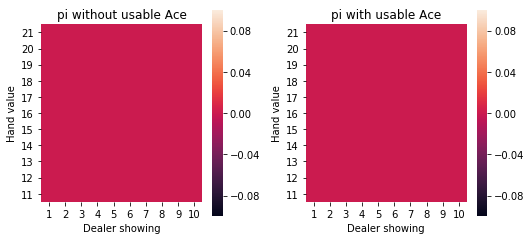

In [9]:
def Render(agent: monte_carlo_control_blackjack.MonteCarloControlBlackjack) -> None:
    """Render the state of the agent as a set of heatmaps."""
    
    def _SetupAxes(ax, title) -> None:
        ax.set_xlabel('Dealer showing')
        ax.set_xticklabels(range(1, 11))
        ax.set_yticklabels(range(21, 10, -1))
        ax.set_ylabel('Hand value')
        ax.set_title(title)
    
    def _Render(table, name):
        fig, (ax1, ax2) = plt.subplots(1,2)
        abs_max = max(abs(table[10:,:,:].min()), abs(table[10:,:,:].max()))
        cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
        sns.heatmap(table[10::-1,:,0], ax=ax1, square=True) #, cmap=cmap) #vmin=-abs_max, vmax=abs_max, center=0, cmap=cmap)
        sns.heatmap(table[10::-1,:,1], ax=ax2, square=True) #, cmap=cmap)# vmin=-abs_max, vmax=abs_max, center=0, cmap=cmap)
        _SetupAxes(ax1, f'{name} without usable Ace')
        _SetupAxes(ax2, f'{name} with usable Ace')
        viz.finalise(figsize=(7.5, 3.5))

    # _Render(agent.N, 'N(s)')
    # _Render(agent.S, 'S(s)')
    # _Render(agent.V, 'V(s)')
    _Render(agent.pi.astype(np.int), 'pi')

agent.Reset()
Render(agent)

In [11]:
# Run the agent for a number of episodes, updating the estimated value function.
agent.Run(50000)

After 50000 episodes ...


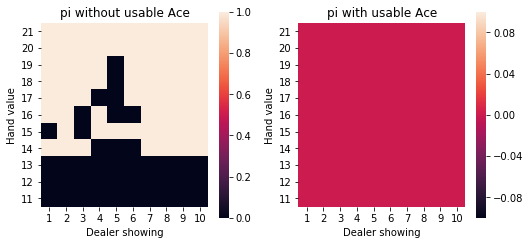

In [12]:
# Render the agent now that it's hard time to estimate the value function.
print(f'After {agent.num_episodes} episodes ...')
Render(agent)